# Numpy 基本内容介绍

1. 简介（使用Numpy的原因）
2. 创建数组（矩阵/向量）与维度处理
3. 数组的拼接与内容选取
4. 数值运算（单个数组）
5. 数值运算（多个数组之间）
6. 数值类型
7. 一些常用模块（随机模块/线性代数模块/统计模块）
8. 两个实际例子（小练习）
9. 自学参考

## 1. 简介（使用Numpy的效率优势）

### 1.1 计算效率比较（Python默认数据结构 vs Numpy数组）

In [1]:
import numpy as np
import math

In [2]:
# a running example to compare efficiency
lst = list(range(1, 100000))
arr = np.array(lst)

In [3]:
%%time
# 列表中每个数完成乘方,再开根号,再求和
for i in range(100):
    lst_result = sum([math.sqrt(item**2) for item in lst])
print(lst_result)

4999950000.0
CPU times: user 3.39 s, sys: 32 ms, total: 3.42 s
Wall time: 3.42 s


In [4]:
%%time
# numpy矩阵中每个数完成乘方,再开根号,再求和
for i in range(100):
    arr_result = np.sum(np.sqrt(np.power(arr, 2)))
print(arr_result)

4999950000.0
CPU times: user 39.9 ms, sys: 1.68 ms, total: 41.6 ms
Wall time: 40.4 ms


In [5]:
# 程序效率之比
(2.96*1000) / 41.2

71.84466019417475

### 1.2 创建数组

In [6]:
arr1 = np.array([1,2,3])
print(arr1)
print(arr1.shape)

arr2 = np.arange(10)
print(arr2)
print(arr2.shape)

[1 2 3]
(3,)
[0 1 2 3 4 5 6 7 8 9]
(10,)


In [7]:
type(arr2.shape)

tuple

np.arange()指定开始/截止/步长

In [8]:
arr = np.arange(0, 10, 2.5)
print(arr);print(arr.shape)

[0.  2.5 5.  7.5]
(4,)


In [9]:
# code here
arr1 = np.array([1,2,3])
print(arr1.shape)
print(arr1)

arr2 = np.arange(10)
print(arr2.shape)
print(arr2)

arr3 = np.arange(0, 10, 2.5)
print(arr3.shape)
print(arr3)

(3,)
[1 2 3]
(10,)
[0 1 2 3 4 5 6 7 8 9]
(4,)
[0.  2.5 5.  7.5]


np.linspace/np.logspace: 指定范围内返回“等间距”数组

In [10]:
# 在一个区间内返回等间距数组
arr1 = np.linspace(1, 101, 5)
print(arr1.shape)
print(arr1)

arr2 = np.linspace(1, 101, 5, endpoint=False)
print(arr2.shape)
print(arr2)

# 10^0=1, 10^2=100
arr3 = np.logspace(0, 2, 5, endpoint=True)
print(arr3.shape)
print(arr3)

(5,)
[  1.  26.  51.  76. 101.]
(5,)
[ 1. 21. 41. 61. 81.]
(5,)
[  1.           3.16227766  10.          31.6227766  100.        ]


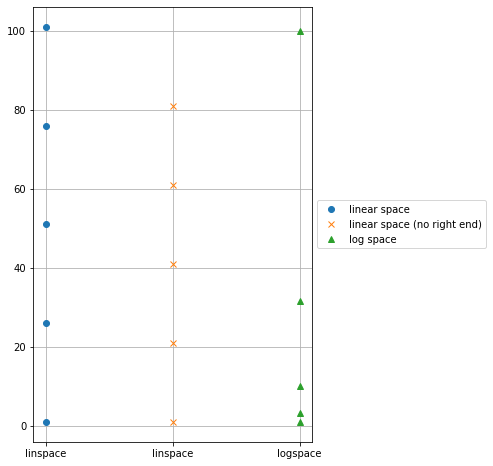

In [11]:
# TODO: draw a plot compare three interpolate
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 1, figsize=(5, 8), facecolor='white')

xx = np.zeros(len(arr3))
plt.plot(xx, arr1, 'o', label="linear space")
plt.plot(xx+1, arr2, 'x', label="linear space (no right end)")
plt.plot(xx+2, arr3, '^', label="log space")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.xaxis.set_ticks(np.arange(0, 3, 1))
labels = ['linspace', 'linspace', 'logspace']
ax.set_xticklabels(labels, )
plt.grid(True, linestyle='-', which='both', axis='both')
plt.show()

reshape改变数组维度/形状

In [12]:
mat1 = np.array([1,2,3, 4,5,6, 7,8,9])
mat2 = mat1.reshape(3, 3)
mat3 = mat1.reshape(1, 3, 3)

print(mat1.shape)
print(mat1)
print()
print(mat2.shape)
print(mat2)
print()
print(mat3.shape)
print(mat3)

(9,)
[1 2 3 4 5 6 7 8 9]

(3, 3)
[[1 2 3]
 [4 5 6]
 [7 8 9]]

(1, 3, 3)
[[[1 2 3]
  [4 5 6]
  [7 8 9]]]


创建单一数填充的数组(np.zeros/ np.ones/ np.full)

In [13]:
arr1 = np.zeros((2,2))
arr2 = np.ones((2, 4))
arr3 = np.full((2, 2), -np.inf)
arr4 = np.full((2, 2), [1, 2])
print(arr1.shape)
print(arr1)
print(arr2.shape)
print(arr2)
print(arr3.shape)
print(arr3)
print(arr4.shape)
print(arr4)

(2, 2)
[[0. 0.]
 [0. 0.]]
(2, 4)
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]
(2, 2)
[[-inf -inf]
 [-inf -inf]]
(2, 2)
[[1 2]
 [1 2]]


np.ones_like/ np.zeros_like

In [14]:
# 使用ones_like返回矩阵
x = np.array([[1,2,3]])
ones_1 = np.ones_like(x)
ones_2 = np.ones(x.shape)
print(x)
print(ones_1)
print(ones_2)

[[1 2 3]]
[[1 1 1]]
[[1. 1. 1.]]


I矩阵（对角线为1）np.identity/ np.eye

In [15]:
# identity matrix
I = np.identity(3)
print(I)
# https://numpy.org/doc/stable/reference/generated/numpy.matlib.eye.html#numpy.matlib.eye
I_rect = np.eye(3, M=5)
print(I_rect)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


np.triu / np.tril: 返回上下三角矩阵

In [16]:
mat2 = np.arange(9).reshape(3,3)
# upper triangle matrix
print(np.triu(mat2))
print(np.tril(mat2))
# lower triangle matrix
print(np.tril(mat2, k=-1))

[[0 1 2]
 [0 4 5]
 [0 0 8]]
[[0 0 0]
 [3 4 0]
 [6 7 8]]
[[0 0 0]
 [3 0 0]
 [6 7 0]]


改变矩阵形状(np.flatten / np.ravel / np.squeeze)

In [17]:
mat1 = np.array([1,2,3, 4,5,6, 7,8,9])
mat3 = mat1.reshape(1, 3, 3)

In [18]:
print(mat3.shape)
print(mat3)
# mat4 = mat3.ravel()
mat4 = mat3.flatten()
print(mat4.shape)
print(mat4)
mat5 = np.squeeze(mat3)
print(mat5.shape)
print(mat5)

(1, 3, 3)
[[[1 2 3]
  [4 5 6]
  [7 8 9]]]
(9,)
[1 2 3 4 5 6 7 8 9]
(3, 3)
[[1 2 3]
 [4 5 6]
 [7 8 9]]


矩阵交换数轴(np.swapaxes)

In [19]:
# 交换轴(行矩阵转化为列矩阵)
x = np.array([[1,2,3]])
print(x)
print(x.shape)
x1 = np.swapaxes(x, 0, 1)
print(x1)
print(x1.shape)

[[1 2 3]]
(1, 3)
[[1]
 [2]
 [3]]
(3, 1)


改变数轴顺序（np.swapaxes / np.T / np.transpose()）

In [20]:
print(mat2.shape)
print(mat2)
mat3 = np.swapaxes(mat2,0,1)
print(mat3.shape)
print(mat3)
mat3 = mat2.T
print(mat3.shape)
print(mat3)

(3, 3)
[[0 1 2]
 [3 4 5]
 [6 7 8]]
(3, 3)
[[0 3 6]
 [1 4 7]
 [2 5 8]]
(3, 3)
[[0 3 6]
 [1 4 7]
 [2 5 8]]


In [21]:
#1*2*3三维矩阵，改变轴的顺序
mat4 = np.zeros((1,2,3))
print(mat4.shape)
mat4 = mat4.transpose(1, 0, 2)
print(mat4.shape)
mat4 = mat4.transpose()
print(mat4.shape)

(1, 2, 3)
(2, 1, 3)
(3, 1, 2)


矩阵的拼接与选取

np.vstack / np.hstack / np.concatenate

In [22]:
a = np.array((1,2,3))
b = np.array((4,5,6))
print(a)
print(b)

print(a.shape, b.shape)
print(np.hstack((a,b)))
print(np.vstack((a,b)))

[1 2 3]
[4 5 6]
(3,) (3,)
[1 2 3 4 5 6]
[[1 2 3]
 [4 5 6]]


In [23]:
print(a.shape)
a = a.reshape(1, -1)
b = b.reshape(1, -1)
print(a.shape)

print(np.vstack((a,b,b)))
print(np.hstack((a,b,b)))

print(np.concatenate((a, b, b), axis=0))
print(np.concatenate((a, b, b), axis=1))

(3,)
(1, 3)
[[1 2 3]
 [4 5 6]
 [4 5 6]]
[[1 2 3 4 5 6 4 5 6]]
[[1 2 3]
 [4 5 6]
 [4 5 6]]
[[1 2 3 4 5 6 4 5 6]]


数组的选取

In [24]:
mat = np.arange(9).reshape(3, 3)
print(mat)
# 选择左上角2*2矩阵
print(mat[:2,:2])
# 选择第一列
print(mat[:,0])
print(mat[:,0].shape)
# 选择第一行和第三行的所有内容
print(mat[: , [0, 2]])

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 1]
 [3 4]]
[0 3 6]
(3,)
[[0 2]
 [3 5]
 [6 8]]


数组的选取

In [25]:
print(mat)
# 选择对角线内容
print(np.diag(mat))
print(np.diag(mat).shape)
# 选择第二行第三列
print(mat[1,2])
print(mat[1][2])

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[0 4 8]
(3,)
5
5


数组的分布选取

In [26]:
print(mat)
# 选取第1行第1列；第3行第3列
print(mat[[0,2],  [0,2]])
# 选取第1/3行第1/3列
print(mat[[0,2], :][:, [0,2]])

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[0 8]
[[0 2]
 [6 8]]


np.where: 根据条件选取索引；两种使用方法

In [27]:
print(mat)
# np.where用法1: 只保留所有大于4的值,<4的值替换为0
print(np.where(mat>4, mat, 0))

# np.where用法2: 根据条件选取特定的值
inds_gt4 = np.where(mat>4)
print(inds_gt4) 
print(mat[np.where(mat>4)])
print(mat[mat>4])

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 0 0]
 [0 0 5]
 [6 7 8]]
(array([1, 2, 2, 2]), array([2, 0, 1, 2]))
[5 6 7 8]
[5 6 7 8]


np.where vs. np.argwhere

In [28]:
print(mat)
# 返回大于4的位置
inds_gt4 = np.where(mat>4)
print(inds_gt4)
inds_gt4 = np.argwhere(mat>4)
print(inds_gt4)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
(array([1, 2, 2, 2]), array([2, 0, 1, 2]))
[[1 2]
 [2 0]
 [2 1]
 [2 2]]


np.isnan vs. np.isinf

In [29]:
arr = np.array([-1, 0, 1])
logarr = np.log(arr)
print(arr)
print(logarr)
print(np.isnan(logarr))
print(np.isinf(logarr))
# 不成立!
print(np.where(logarr==np.inf))
# 成立
print(np.where(np.isinf(logarr)))

[-1  0  1]
[ nan -inf   0.]
[ True False False]
[False  True False]
(array([], dtype=int64),)
(array([1]),)


/var/folders/71/d5xhvtkn215cb3g26qsjh5q00000gn/T/ipykernel_16673/780506060.py:2: RuntimeWarning: divide by zero encountered in log
  logarr = np.log(arr)
/var/folders/71/d5xhvtkn215cb3g26qsjh5q00000gn/T/ipykernel_16673/780506060.py:2: RuntimeWarning: invalid value encountered in log
  logarr = np.log(arr)


### P4 数值运算（单个数组）

In [30]:
# 补充:np经常使用的常量
# https://numpy.org/doc/stable/reference/constants.html
print(np.nan)
print(np.inf)
print(np.e)
print(np.pi)
print(np.newaxis)
x = np.arange(3)
print(x)
print(x.shape)
x = x[np.newaxis, np.newaxis, :]
print(x.shape)
x = x.reshape(1, 1, -1)
print(x.shape)

nan
inf
2.718281828459045
3.141592653589793
None
[0 1 2]
(3,)
(1, 1, 3)
(1, 1, 3)


按位运算符（加减乘除）

In [31]:
# 常用的运算符 + - * /
mat = np.arange(0,4).reshape((2,2))
print(mat)
# 矩阵与数字的加减乘除
print(mat + 1)
print(mat - 1)

print(mat * 2)
print(mat / 2)

[[0 1]
 [2 3]]
[[1 2]
 [3 4]]
[[-1  0]
 [ 1  2]]
[[0 2]
 [4 6]]
[[0.  0.5]
 [1.  1.5]]


In [32]:
# 更多函数运算
print(np.exp(mat))
print(np.sin(mat))
print(np.power(mat, 2))

[[ 1.          2.71828183]
 [ 7.3890561  20.08553692]]
[[0.         0.84147098]
 [0.90929743 0.14112001]]
[[0 1]
 [4 9]]


np.sum / np.cumsum

In [33]:
mat = np.array([0, 1, 2, 3]).reshape((2, 2))
print(mat)
print(np.sum(mat, axis=0))
print(np.sum(mat, axis=1))
print(np.sum(mat))
print(np.cumsum(mat, axis=0))
print(np.cumsum(mat))

[[0 1]
 [2 3]]
[2 4]
[1 5]
6
[[0 1]
 [2 4]]
[0 1 3 6]


### P5 数值运算（多个数组）

In [34]:
vec1 = np.array([1,2])
vec2 = np.array([2,1])
print(vec1 * vec2)
# 矩阵的内积
print(np.dot(vec1, vec2))
# 矩阵的外积
print(np.outer(vec1, vec2))

[2 2]
4
[[2 1]
 [4 2]]


In [35]:
print(np.matmul(vec1, vec2))
print(vec1 @ vec2)
print(np.matmul(vec1.reshape(-1, 1), vec2.reshape(1, -1)))
print(vec1.reshape(-1, 1) @ vec2.reshape(1, -1))

4
4
[[2 1]
 [4 2]]
[[2 1]
 [4 2]]


boardcasting

In [36]:
arr1 = np.array([[1, 2], [3, 4]])
# (1, 2): 一行两列
vec2 = np.array([0, 1]).reshape(1, -1)
# (2, 1): 两行一列
vec1 = np.array([0, 1]).reshape(-1, 1)
print(arr1 * vec1)
print(arr1 * vec2)

[[0 0]
 [3 4]]
[[0 2]
 [0 4]]


In [37]:
# 多维度补齐例子
# (与R语言中的循环机制(recycling)不同，
# 只有维度为一的地方才能被补齐)
arr1 = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
vec1 = np.array([[0, 1], [2, 3]]).reshape(2, 2)
print(arr1 + vec1)

ValueError: operands could not be broadcast together with shapes (4,2) (2,2) 

### P6数值类型

In [38]:
# 不同数据格式/类型
mat = np.arange(4).reshape(2,2)
print(mat)
print(mat.dtype)
mat = mat - 1.1
print(mat)
print(mat.dtype)
mat = mat + (1+1j)
print(mat)
print(mat.dtype)

[[0 1]
 [2 3]]
int64
[[-1.1 -0.1]
 [ 0.9  1.9]]
float64
[[-0.1+1.j  0.9+1.j]
 [ 1.9+1.j  2.9+1.j]]
complex128


In [39]:
mat = mat.astype(np.float64)
print(mat)
mat = mat.astype(int)
print(mat)
# 等价于: mat != 0
mat = mat.astype(np.bool_)
print(mat)
print(mat.dtype)

[[-0.1  0.9]
 [ 1.9  2.9]]
[[0 0]
 [1 2]]
[[False False]
 [ True  True]]
bool


/var/folders/71/d5xhvtkn215cb3g26qsjh5q00000gn/T/ipykernel_16673/3583761371.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  mat = mat.astype(np.float64)


### P7 一些常用模块

In [40]:
# 随机矩阵
# numpy.random.rand 随机数模块
print(np.random.rand(3,2))  # 0-1之间的均匀分布

# 整数随机取值；注意：左开右闭区间[0,2)
print(np.random.randint(0, 2, size=(3,2)))
# https://numpy.org/doc/stable/reference/random/generator.html

[[0.10887029 0.83041143]
 [0.2045231  0.05534957]
 [0.46299731 0.19751136]]
[[0 1]
 [0 0]
 [1 1]]


In [41]:
# 实际例子1: 解决线性方程（演示linalg模块）
# x1 + x2 = 3
# 2x1 + x2 = 4
# solve x1, x2
# matrix form A x = b
A = np.array([[1, 1], [2, 1]]).reshape(2, 2)
b = np.array([3, 4]).reshape(-1, 1)
x = np.linalg.inv(A) @ b
print(A)
print(b)
print(x)

[[1 1]
 [2 1]]
[[3]
 [4]]
[[1.]
 [2.]]


In [42]:
# 标准正太分布 N(0, 1) 取样1000次
arr = np.random.randn(1000, 1)
# 求：数据的平均值/中位数/方差/标准差/
print('{:.4f}'.format(np.mean(arr)))
print('{:.4f}'.format(np.nanmean(arr)))

print('{:.4f}'.format(np.median(arr)))
print('{:.4f}'.format(np.nanmedian(arr)))

print('{:.4f}'.format(np.var(arr)))
print('{:.4f}'.format(np.nanvar(arr)))

print('{:.4f}'.format(np.std(arr)))
print('{:.4f}'.format(np.nanstd(arr)))

0.0310
0.0310
0.0720
0.0720
0.9209
0.9209
0.9596
0.9596


### P8实例（两个小练习）
- 图片处理
- monte carlo仿真（Gambler's Ruin问题）

(28, 28)


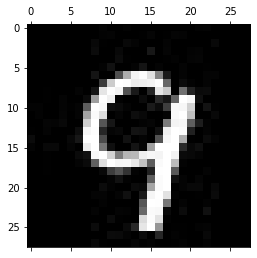

In [43]:
# 实际例子2: RGB图像处理
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib

num_9=mpimg.imread('image/9_1.jpg')
num_5=mpimg.imread('image/5_1.jpg')
num_1=mpimg.imread('image/1_1.jpg')

print(num_9.shape)

plt.matshow(num_9, cmap="Greys_r", vmin=0, vmax=256)
plt.show()
# 使用常用的语法，完成如下例子
# 1. 左右翻转
# 2. 顺时针旋转90度
# 3. 拼接‘951’
# 4. 还原RGB数字‘951'

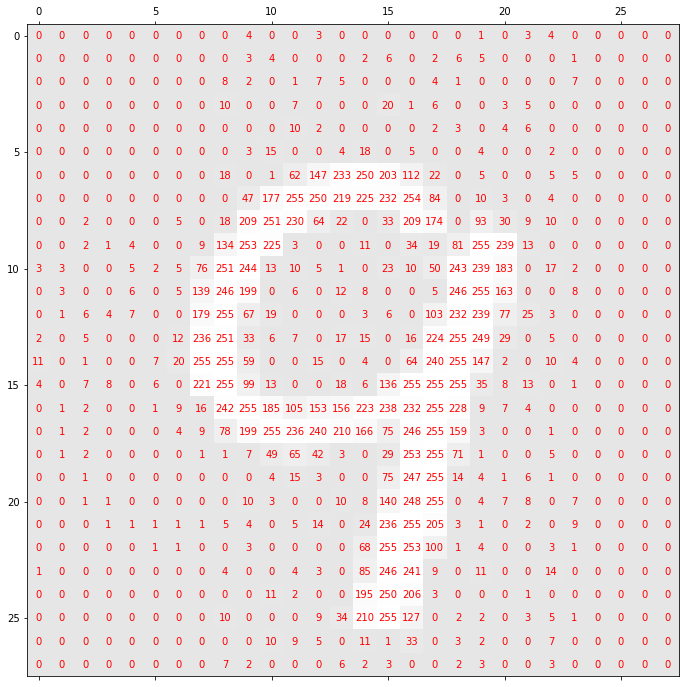

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12), facecolor="white")
ax.matshow(num_9, cmap="Greys_r", vmin=0, vmax=256, alpha=0.1)

for (j,i),label in np.ndenumerate(num_9):
    ax.text(i, j, label, ha='center', va='center', color='red')

plt.show()

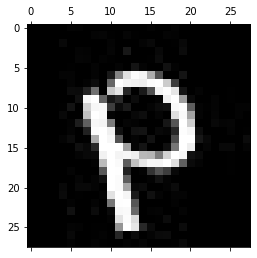

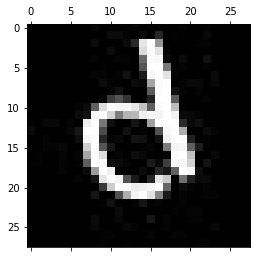

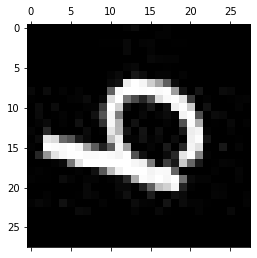

In [45]:
# 使用常用的语法，完成如下例子
# 1. 左右翻转
# 2. 顺时针旋转90度
# 3. 拼接‘951’
# 4. 还原RGB数字‘951'

# 左右翻转
# number_lr = np.fliplr(num_9)
number_lr = num_9[:, ::-1]
plt.matshow(number_lr, cmap="Greys_r", vmin=0, vmax=256)

# 上下翻转
# number_ud = np.flipud(num_9)
number_ud = num_9[::-1, :]
plt.matshow(number_ud, cmap="Greys_r", vmin=0, vmax=256)

# 顺时针旋转90度 == 逆时针旋转270度
number_rot = np.rot90(num_9, k=3)
plt.matshow(number_rot, cmap="Greys_r", vmin=0, vmax=256)

(3, 28, 28)
(28, 28, 3)


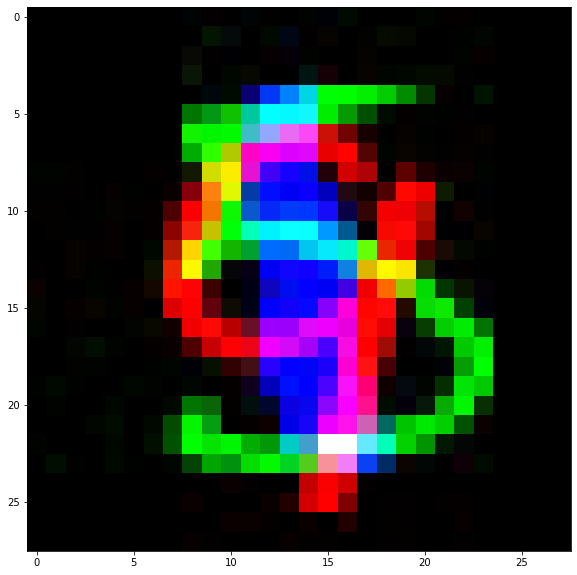

In [46]:
# 拼接图层
fig, ax = plt.subplots(1, 1, figsize=(10, 10), facecolor="white")
# 拼接为951
# num_951 = np.hstack((num_9, num_5, num_1))
# print(num_951.shape)
# ax.matshow(num_951, cmap="Greys_r", vmin=0, vmax=256)

# 保存在三个图层
num_rgb = np.array([num_9, num_5, num_1]).astype(int)
print(num_rgb.shape)
# num_rgb = num_rgb.swapaxes(0,2)
# num_rgb = num_rgb.swapaxes(0,1)
num_rgb = np.moveaxis(num_rgb, [0,1,2], [2,0,1])
print(num_rgb.shape)
# fig, ax = plt.subplots(1, 1)
ax.imshow(num_rgb)

Gambler's Ruin

In [47]:
# 实际例子3: 仿真Gambler's ruin 赌徒的困境
# 赌徒有一半的概率赢得赌局，每次赌局结果相互独立
# 每次赌1元钱，每次赢赌局赢得额外1元，否则输掉1元
# 问：赌徒初始有10元，赌局100次后，输掉10元钱（破产）的概率？

# 仿真200次(200行)，每次仿真走100步(100列)
results = np.random.rand(200, 100)
results[results > 0.5] = 1  # gain $1
results[results < 0.5] = -1  # loss $1
print(results[:5, :10])

[[ 1.  1. -1.  1.  1.  1.  1. -1. -1. -1.]
 [ 1. -1.  1.  1.  1. -1. -1. -1.  1. -1.]
 [-1.  1.  1.  1.  1.  1.  1. -1. -1. -1.]
 [-1. -1.  1.  1.  1.  1.  1.  1.  1. -1.]
 [-1.  1. -1. -1. -1.  1.  1.  1. -1. -1.]]


In [48]:
import matplotlib
matplotlib.rcParams['font.family'] = ['Heiti TC']
plt.rcParams.update({'font.size': 22})
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)

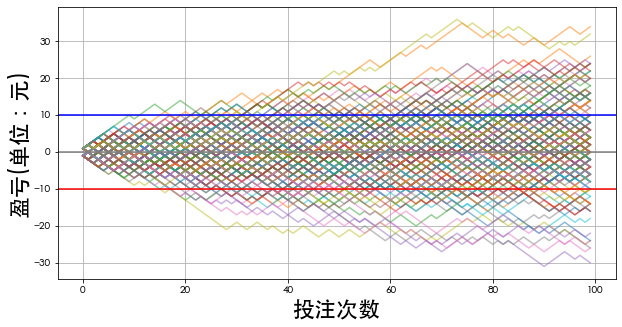

In [49]:
# 显示每一步的现金
results_cum = np.cumsum(results, axis=1)
# visualize the results
fig, ax = plt.subplots(1, 1, figsize=(10, 5), facecolor="white")
Row, Col = results_cum.shape
for j in range(Row):  # for each column/time
    trial = results_cum[j, :]
    plt.plot(range(100), trial, alpha=0.5)
# print ref line
plt.axhline(y=0, color='grey', linestyle='-')
plt.axhline(y=-10, color='r', linestyle='-')
plt.axhline(y=10, color='b', linestyle='-')
plt.xlabel("投注次数")
plt.ylabel("盈亏(单位：元)")
plt.grid()
plt.show()

In [50]:
# 如果赚到额外10元或者亏完10元，则赌徒离场，后面的面额显示为恒定值
RNum, CNum = results_cum.shape

# state=0: running; state=1: loss; state=2: win
result_state = np.full((RNum, 1), fill_value=0)
for col in range(CNum):
    result_at_time = results_cum[:, col]
    broke_rows = np.where(result_at_time <= -10)
    win_rows = np.where(result_at_time >= 10)
    results_cum[broke_rows, col+1:] = -10
    results_cum[win_rows, col+1:] = 10

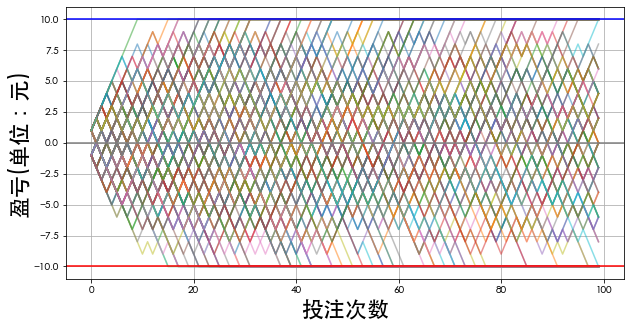

In [51]:
# visualize the results
fig, ax = plt.subplots(1, 1, figsize=(10, 5), facecolor="white")
Row, Col = results_cum.shape
for j in range(Row):  # for each column/time
    trial = results_cum[j, :]
    plt.plot(range(100), trial, alpha=0.5)
# print ref line
plt.axhline(y=0, color='grey', linestyle='-')
plt.axhline(y=-10, color='r', linestyle='-')
plt.axhline(y=10, color='b', linestyle='-')
plt.xlabel("投注次数")
plt.ylabel("盈亏(单位：元)")
plt.grid()
plt.show()

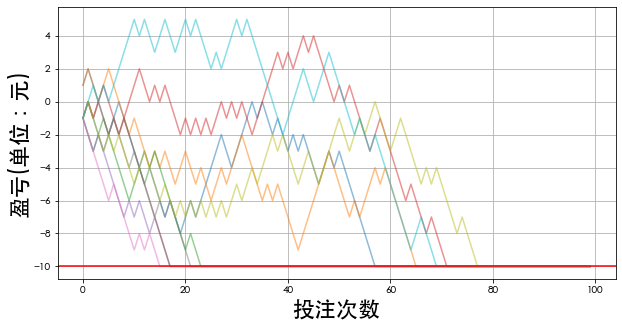

In [52]:
# plot first 10 broke trial
broke_cum_results = results_cum[np.nanmin(results_cum, axis=1) <= -10][:10]

# visualize the results
fig, ax = plt.subplots(1, 1, figsize=(10, 5), facecolor="white")
Row, Col = broke_cum_results.shape
for j in range(Row):  # for each column/time
    trial = broke_cum_results[j, :]
    plt.plot(range(100), trial, alpha=0.5)
# print ref line
# plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=-10, color='r', linestyle='-')
plt.xlabel("投注次数")
plt.ylabel("盈亏(单位：元)")
plt.grid()
plt.show()

In [53]:
count_loss = sum(np.nanmin(results_cum, axis=1) <= -10)
count_win = sum(np.nanmax(results_cum, axis=1) >= 10)
count_running = sum( (np.nanmin(results_cum, axis=1) > -10) & (np.nanmax(results_cum, axis=1) < 10) )
print(f"赔光离场{count_loss}次；")
print(f"翻倍离场{count_win}次；")
print(f"200回合内未结束{200-count_win-count_loss}次；")
# 理论值 p1 = n2/(n1+n2); p2 = n1/(n1+n2)

赔光离场58次；
翻倍离场71次；
200回合内未结束71次；
